## Clone Repo

In [1]:
!git clone https://github.com/Ojus999/Machine-Learning-Sem-6.git

Cloning into 'Machine-Learning-Sem-6'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 42 (delta 6), reused 37 (delta 4), pack-reused 0
Receiving objects: 100% (42/42), 33.34 MiB | 20.95 MiB/s, done.
Resolving deltas: 100% (6/6), done.


## Import Dependencies

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import cv2

## Loading the Dataset

In [7]:
def load_mnist_images(path):
    with open(path, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    return data.reshape(-1, 28*28)

def load_mnist_labels(path):
    with open(path, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
    return data

X_train = load_mnist_images('/content/Machine-Learning-Sem-6/Ex 4/mnist/train-images-idx3-ubyte/train-images.idx3-ubyte')
y_train = load_mnist_labels('/content/Machine-Learning-Sem-6/Ex 4/mnist/train-labels-idx1-ubyte/train-labels.idx1-ubyte')
X_test = load_mnist_images('/content/Machine-Learning-Sem-6/Ex 4/mnist/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte')
y_test = load_mnist_labels('/content/Machine-Learning-Sem-6/Ex 4/mnist/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

## Pre-Processing the Data

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Exploratory Data Analysis

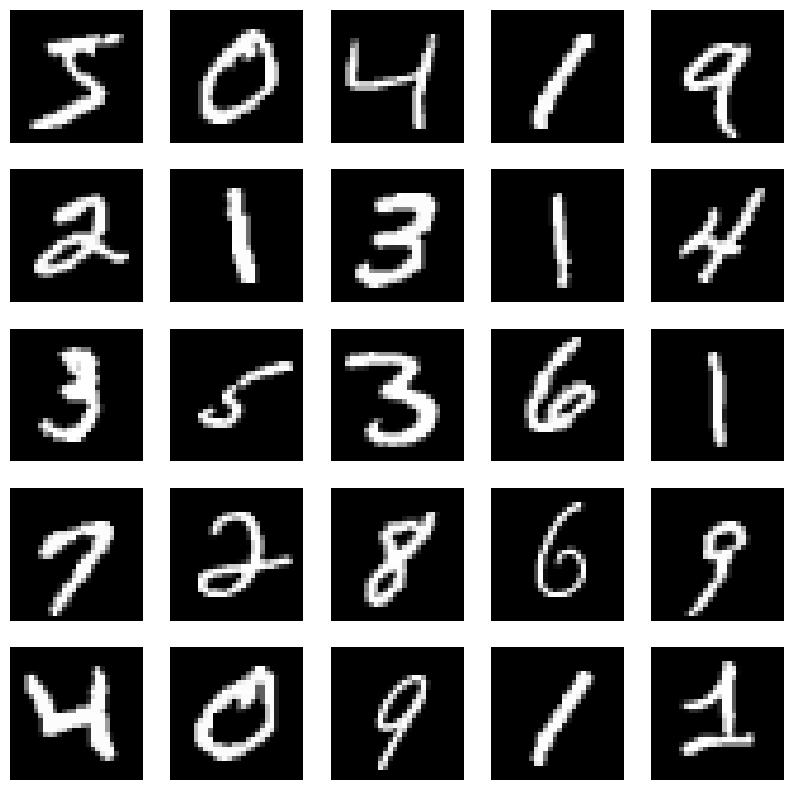

In [13]:
# Visualization of some samples from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

## Train Test Split

In [14]:
#Split the data into training, testing, and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

## Train the Model

In [21]:
# Train the model
svm_model = svm.SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=10)

## Test The Model

In [16]:
#Test the model
y_pred = svm_model.predict(X_test)

## Measure Performance

In [17]:
#Measure the performance of the trained model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9841
Confusion Matrix:
 [[ 974    0    1    0    0    2    0    1    2    0]
 [   0 1129    3    0    0    1    0    1    1    0]
 [   5    1 1013    1    1    0    2    5    4    0]
 [   0    0    3  995    0    2    0    4    3    3]
 [   1    0    3    0  965    0    2    0    0   11]
 [   2    0    0    9    1  873    3    0    2    2]
 [   3    2    0    0    2    3  946    0    2    0]
 [   0    3    8    2    1    0    0 1007    0    7]
 [   1    0    2    3    1    2    1    2  959    3]
 [   1    3    0    7    7    3    1    6    1  980]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0

## Visualize Confusion Matrix

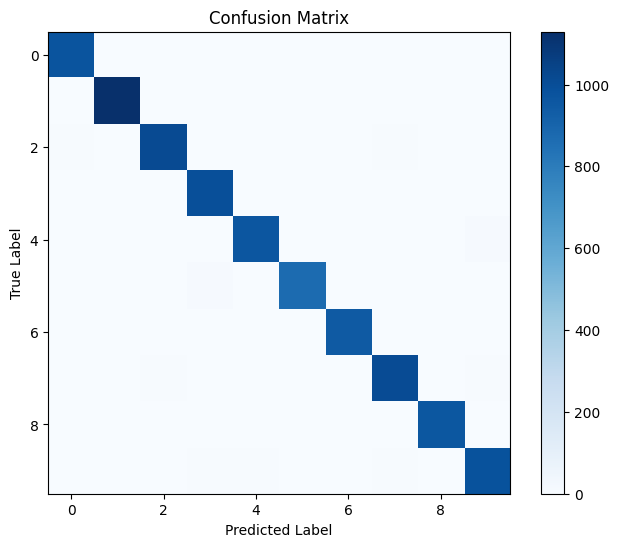

In [18]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()